In [1]:
# load libraries
import sys
sys.path.append("../../../")

import pandas as pd
from utils.dataloader import googleplay
from utils.describe import describe

# load the data
df = googleplay(config=None, path="../../../data/ikea_en.csv")
df = df.iloc[:1000,:] # subsample for faster processing
print(describe(df, "content", score_col="score"))

{'n_rows': 1000, 'n_missing_text': 0, 'n_missing_score': 0, 'n_unique_text': 932, 'n_unique_score': 5, 'dtype_text': dtype('O'), 'dtype_score': dtype('int64'), 'stats_score': count    1000.000000
mean        3.596000
std         1.781561
min         1.000000
25%         1.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: score, dtype: float64, 'distribution_score': score
5    56.7
1    28.7
4     7.3
2     3.7
3     3.6
Name: proportion, dtype: float64, 'skew_score': -0.6394638251906569, 'kurt_score': -1.4611554508172815, 'skewed': False, 'kurtotic': False, 'outlier': False, 'high_cardinality': False, 'highly_correlated': False}


In [2]:
# load the model
from models import DICTIONARY_MODELS

model = DICTIONARY_MODELS["Vader"] # gets the function for the model
model_instance = model()

In [3]:
# calculate the sentiment
df["sentiment"] = df["content"].apply(lambda x: model_instance.polarity_scores(x)["compound"])

<Axes: >

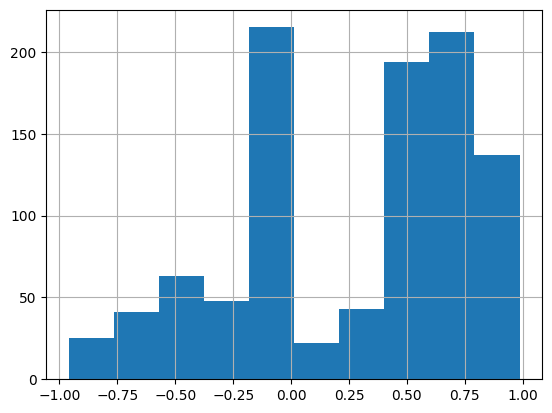

In [4]:
df["sentiment"].hist()